# Create Schelling diagrams of interesting strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

## Load experiments 

In [2]:
big = pd.read_csv("../experiments/12-agents-smaller.csv", skiprows=6)
big["num-turtles-s2"] = 12 - big["num-turtles-s1"]
prison = pd.read_csv("../experiments/prison.csv", skiprows=6)
prison["num-turtles-s2"] = 12 - prison["num-turtles-s1"]
hunt = pd.read_csv("../experiments/hunt.csv", skiprows=6)
hunt["num-turtles-s2"] = 12 - hunt["num-turtles-s1"]

prison

,[run number],render?,always-update-turtle-constants,density,spread-rate,num-turtles-s1,num-turtles-s2,shoot-vision-s1,shoot-vision-s2,shoot-accuracy-s1,...,eat-vision-s2,eat-threshold-s1,eat-threshold-s2,[step],overall-avg-gain,s1-avg-gain,s2-avg-gain,equality,sum-tics-alive / (ticks * num-turtles),sum-time-gains / (sum [gain] of turtles + 0.001)
0,4,False,False,30,10,3,9,5,5,50,...,5,2,1,1000,0.139056,0.050384,0.168613,0.727405,0.610917,496.367429
1,2,False,False,30,10,1,11,5,5,50,...,5,2,1,1000,0.140307,0.084084,0.145418,0.831947,0.596000,495.279729
2,3,False,False,30,10,2,10,5,5,50,...,5,2,1,1000,0.157407,0.088589,0.171171,0.837629,0.633667,478.869381
3,1,False,False,30,10,0,12,5,5,50,...,5,2,1,1000,0.155322,0.000000,0.155322,0.839062,0.611583,477.137230
4,5,False,False,30,10,4,8,5,5,50,...,5,2,1,1000,0.192860,0.132132,0.223223,0.851960,0.660833,524.970794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,False,False,30,10,8,4,5,5,50,...,5,2,1,1000,0.167251,0.115616,0.270521,0.747423,0.792333,497.824191
386,387,False,False,30,10,9,3,5,5,50,...,5,2,1,1000,0.197114,0.168836,0.281949,0.853852,0.872000,492.495348
387,388,False,False,30,10,10,2,5,5,50,...,5,2,1,1000,0.175092,0.157157,0.264765,0.862614,0.926000,510.363263
388,389,False,False,30,10,11,1,5,5,50,...,5,2,1,1000,0.208292,0.196833,0.334334,0.879121,0.970750,496.728676


## Fill missing complementary data

In [3]:
records = []
def swap_strategies(row):
    row = row.to_dict()
    keys = list(row.keys())
    for key in keys:
        if "s1" in key:
            k1 = key
            k2 = key.replace("s1", "s2")
            row[k1], row[k2] = row[k2], row[k1]
    records.append(row)
    
for row in big.iloc:
    swap_strategies(row)

second_half = pd.DataFrame.from_records(records)
data = pd.concat([big, second_half, prison, hunt]).reset_index(drop=True)
data.rename(columns = {'sum-tics-alive / (ticks * num-turtles)':'peace', 'sum-time-gains / (sum [gain] of turtles + 0.001)':'sustanability'}, inplace = True)
data

,[run number],render?,always-update-turtle-constants,density,spread-rate,num-turtles-s1,num-turtles-s2,shoot-vision-s1,shoot-vision-s2,shoot-accuracy-s1,...,eat-vision-s2,eat-threshold-s1,eat-threshold-s2,[step],overall-avg-gain,s1-avg-gain,s2-avg-gain,equality,peace,sustanability
0,3,False,False,30,10,2,10,5,5,50,...,5,0,0,1000,0.057057,0.057558,0.056957,0.757654,1.000000,123.822918
1,2,False,False,30,10,1,11,5,5,50,...,5,0,0,1000,0.051468,0.056056,0.051051,0.750640,1.000000,113.805326
2,4,False,False,30,10,3,9,5,5,50,...,5,0,0,1000,0.055722,0.042376,0.060171,0.723154,1.000000,122.654008
3,1,False,False,30,10,0,12,5,5,50,...,5,0,0,1000,0.053303,0.000000,0.053303,0.761998,1.000000,114.038945
4,6,False,False,30,10,5,7,5,5,50,...,5,0,0,1000,0.050384,0.047047,0.052767,0.839228,1.000000,111.196836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,386,False,False,30,10,8,4,5,5,50,...,5,3,0,1000,0.103353,0.060686,0.188689,0.664547,0.910417,319.377466
12116,387,False,False,30,10,9,3,5,5,50,...,5,3,0,1000,0.104354,0.064509,0.223891,0.637690,0.951333,378.936548
12117,389,False,False,30,10,11,1,5,5,50,...,5,3,0,1000,0.147231,0.130494,0.331331,0.802414,0.988000,500.588385
12118,388,False,False,30,10,10,2,5,5,50,...,5,3,0,1000,0.117534,0.095095,0.229730,0.702785,0.958000,426.432629


## Utility functions for creating Schelling diagrams

In [4]:
def get_strategy_data(strategy):
    query = " & ".join(f"`{key}` == {value}" for key, value in strategy.items())
    strat_data = data.query(query)
    return strat_data

def make_outcome_rows(row, records, s1_name="s1", s2_name="s2"):
    if (row["num-turtles-s1"] > 0):
        s1_row = {"strategy": s1_name}
        s1_row[f"number of {s1_name}"] = row["num-turtles-s1"]
        s1_row["avg-gain"] = row["s1-avg-gain"]
        records.append(s1_row)
        
    if (row["num-turtles-s2"] > 0):
        s2_row = {"strategy": s2_name}
        s2_row[f"number of {s1_name}"] = row["num-turtles-s1"]
        s2_row["avg-gain"] = row["s2-avg-gain"]
        records.append(s2_row)
    
    all_row = {"strategy": "all"}
    all_row[f"number of {s1_name}"] = row["num-turtles-s1"]
    all_row["avg-gain"] = row["overall-avg-gain"]
    records.append(all_row)
    
def create_schelling(strat_data, title=None, s1_name="s1", s2_name="s2"):
    records = []
    for row in strat_data.iloc:
        make_outcome_rows(row, records, s1_name, s2_name)

    data_schelling = pd.DataFrame.from_records(records)
    data_schelling = data_schelling.sort_values("strategy")
    fig = sns.lineplot(data=data_schelling, x=f"number of {s1_name}", y="avg-gain", hue="strategy", markers=True, err_style="bars")
    fig.set(title=title)
    return fig

def create_metric_plots(strat_data, title=None):
    eq_fig = sns.lineplot(data=strat_data, x="num-turtles-s1", y="equality")
    eq_fig.set(title=title)
    plt.show()
    
    
    peace_fig = sns.lineplot(data=strat_data, x="num-turtles-s1", y="peace")
    peace_fig.set(title=title)
    plt.show()
    
    sust_fig = sns.lineplot(data=strat_data, x="num-turtles-s1", y="sustanability")
    sust_fig.set(title=title)
    plt.show()

plt.rcParams['figure.dpi'] = 100

## Plot diagrams for selected strategies

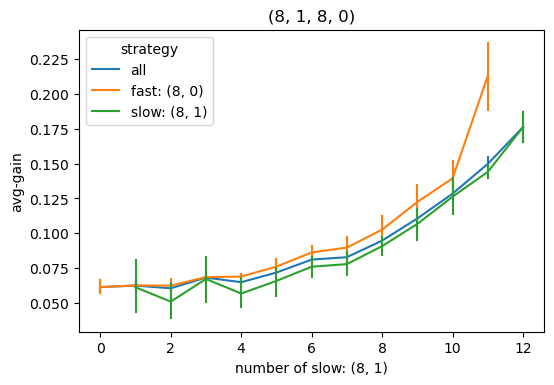

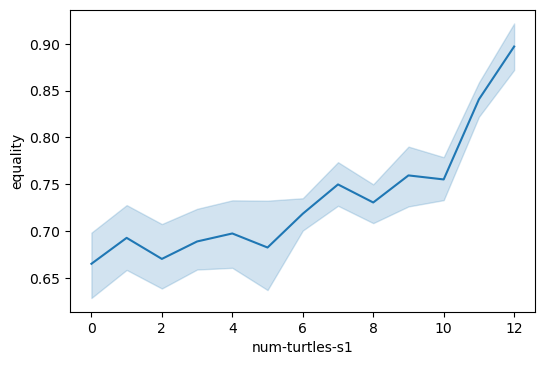

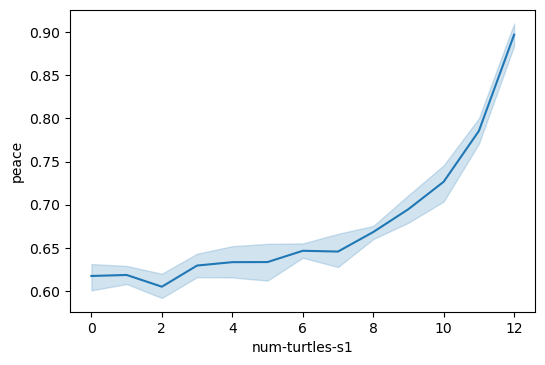

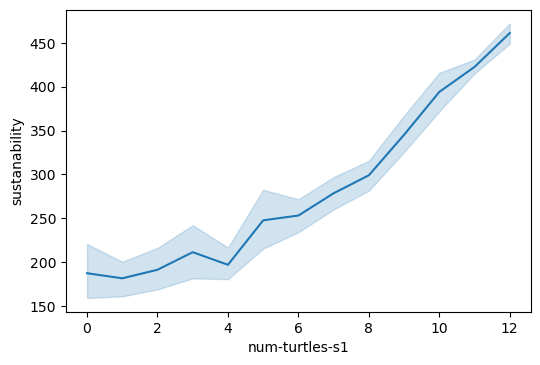

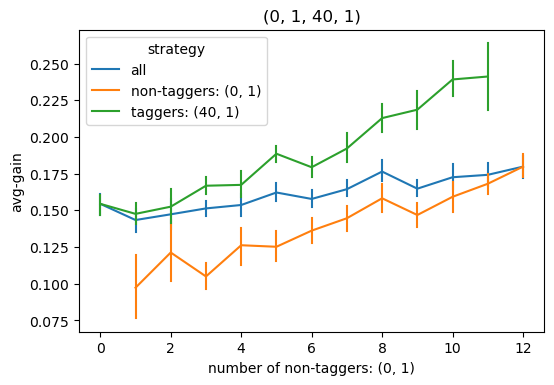

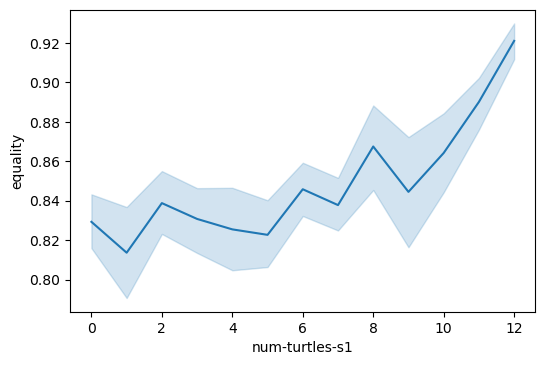

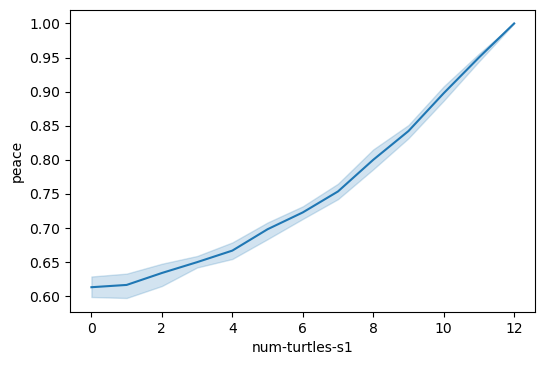

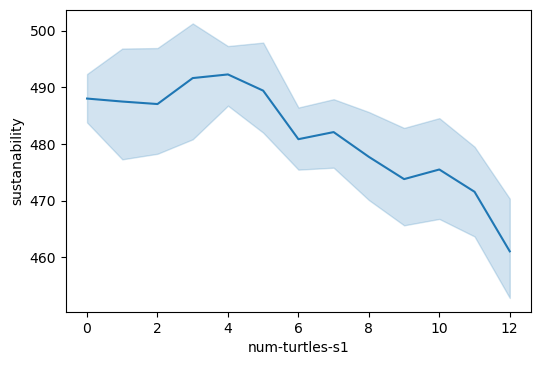

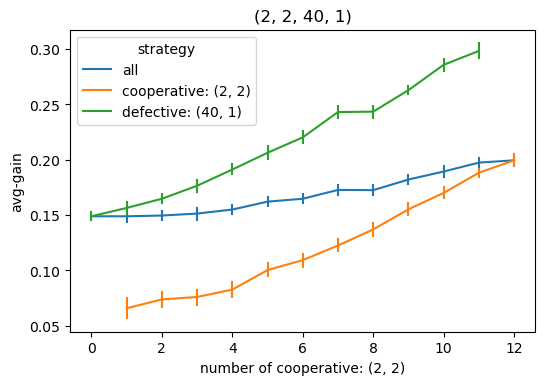

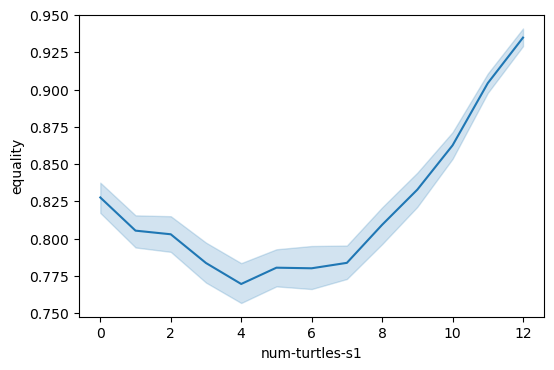

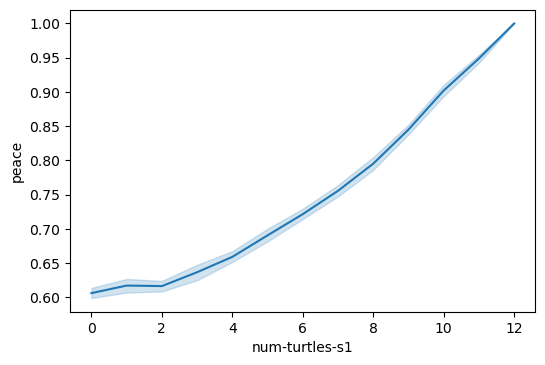

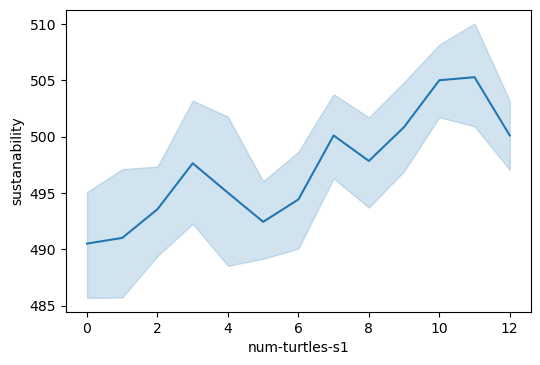

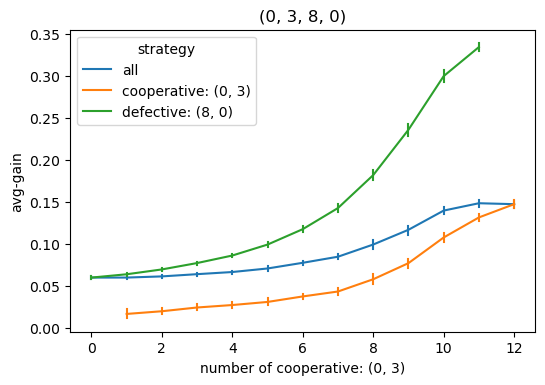

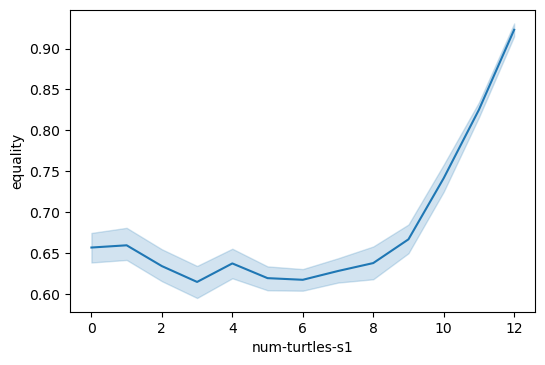

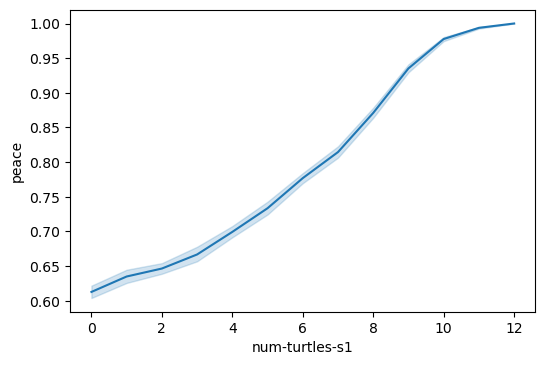

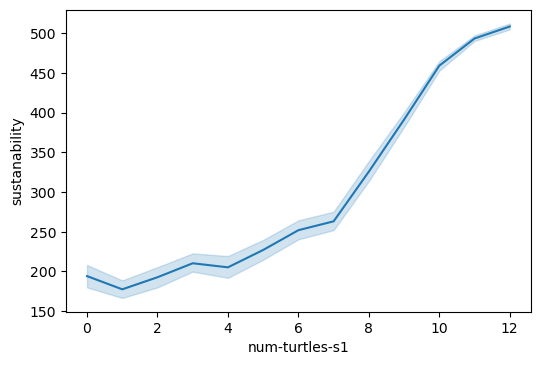

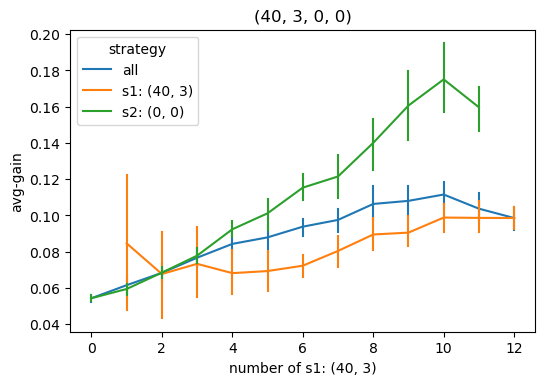

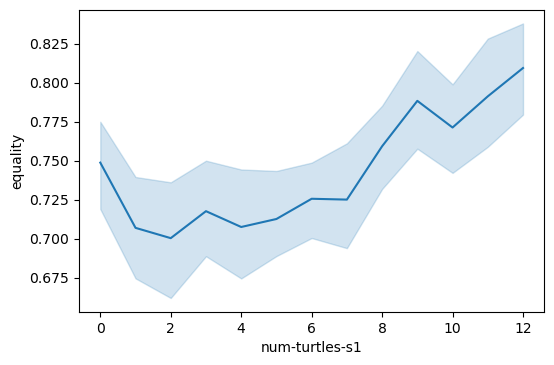

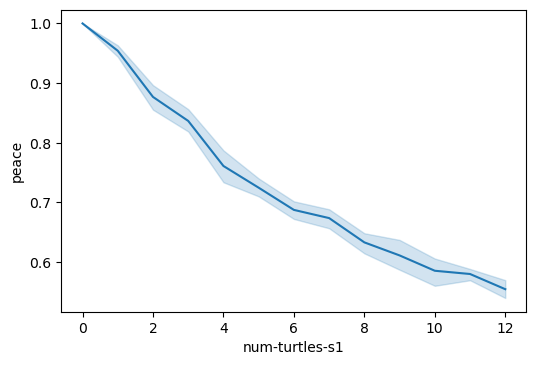

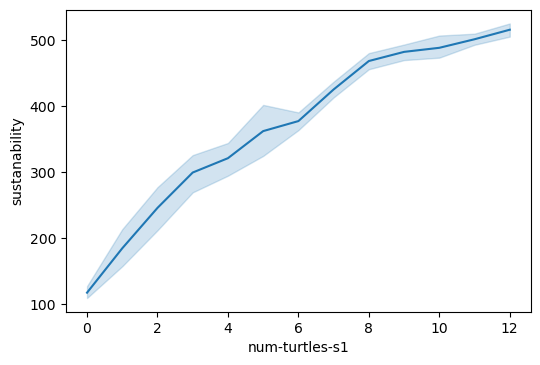

In [7]:
strategies={
    "slow_vs_fast": ((8, 1, 8, 0), ("slow", "fast")),
    "taggers_vs_nonteggers": ((0, 1, 40, 1), ("non-taggers", "taggers")),
    "prisoners": ((2, 2, 40, 1), ("cooperative", "defective")),
    "stag": ((0,3,8,0), ("cooperative", "defective")),
    "hump": ((40,3,0,0), ("s1", "s2"))
}
plt.rcParams['figure.dpi'] = 100
for name, (strat, (s1_name, s2_name)) in strategies.items():
    strategy = {"shoot-threshold-s1": strat[0], "shoot-threshold-s2": strat[2], "eat-threshold-s1": strat[1], "eat-threshold-s2": strat[3]}
    strategy_data = get_strategy_data(strategy)
    create_schelling(strategy_data, str(strat), f"{s1_name}: ({strat[0]}, {strat[1]})", f"{s2_name}: ({strat[2]}, {strat[3]})")
    plt.show()
    create_metric_plots(strategy_data)
